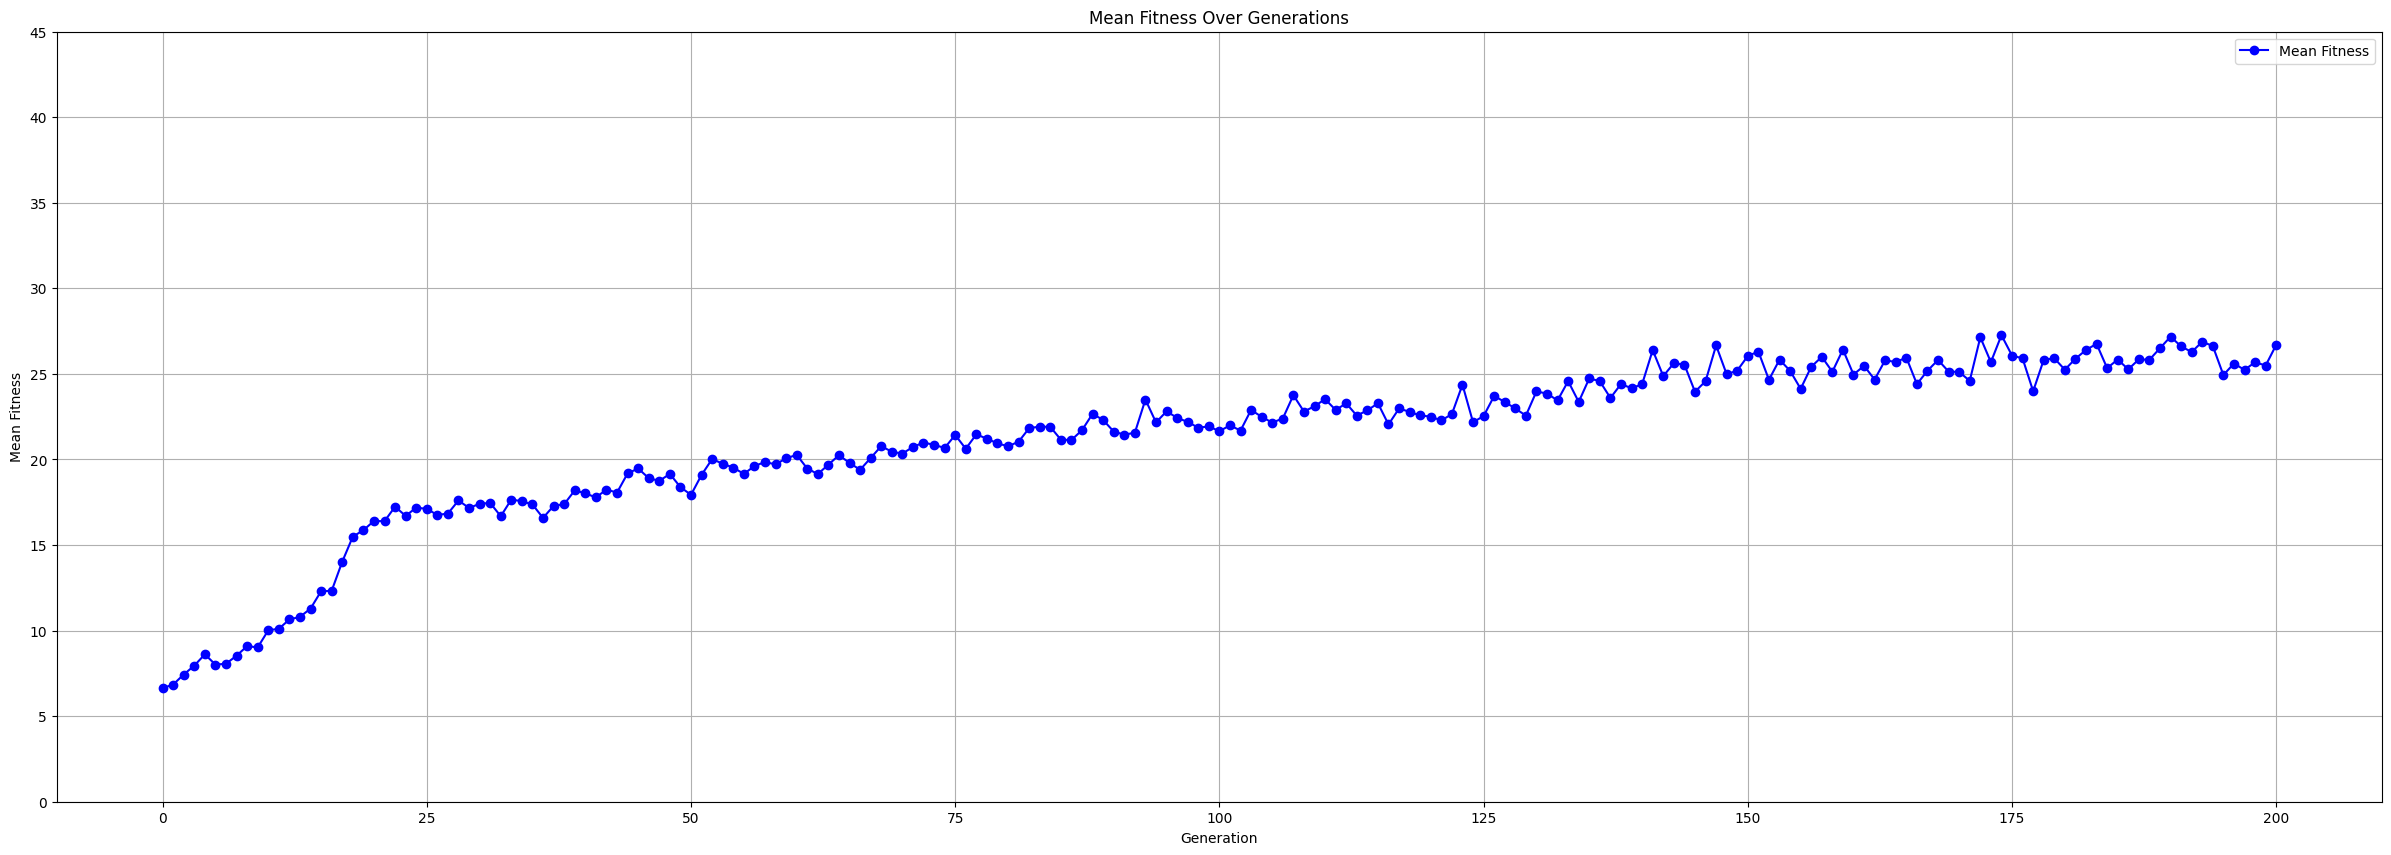

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'evolution_data.csv'
data = pd.read_csv(file_path)

# Extract relevant columns
generations = data['Generation']
fitness = data['Fitness']

# Calculate mean fitness for each generation
mean_fitness = data.groupby('Generation')['Fitness'].mean()

# Plot the data
plt.figure(figsize=(30, 10))
plt.plot(mean_fitness.index, mean_fitness.values, marker='o', linestyle='-', color='b', label='Mean Fitness')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.title('Mean Fitness Over Generations')
plt.legend()
plt.grid(True)

# Set y-axis limits
plt.ylim(0, 45)

# Show the plot
plt.show()